# 1. Let’s import the data

In [1]:
 import pandas as pd

In [2]:
df = pd.read_csv("titanic_dataset/train.csv")

# 2. EDA (Exploratory data analysis)

In [3]:
# columns information
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
print(f"Total number of columns are {len(list(df.columns))}")

Total number of columns are 12


In [5]:
# Let's seperate the dataset
y = df[["Survived"]]

In [7]:
X = df.copy(deep=True) # Let's do a copy in order to preseve the df dataset in memory and saved from inplace operations

In [8]:
# Let's remove passenger id, and consider be moved -1
X = X.drop("PassengerId", axis=1)

In [9]:
X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# For our first version of the model let's remove also Name and ticket from the equation
col_to_remove = ["Name", "Ticket", "Cabin"]
for col in col_to_remove:
    try:
        X = X.drop(col, axis=1) # can use inplace=True
    except KeyError:
        print(f"{col} not in data")

In [11]:
# Let's take a look in the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
import matplotlib.pyplot as plt

In [13]:
columns = X.columns[:-1] # Embarked cannot be plotted just yet because is not either categorical or converted to numbers

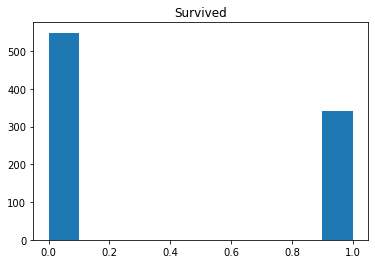

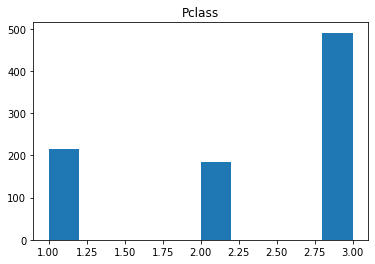

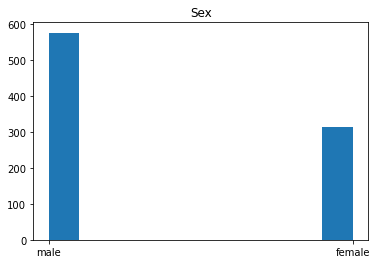

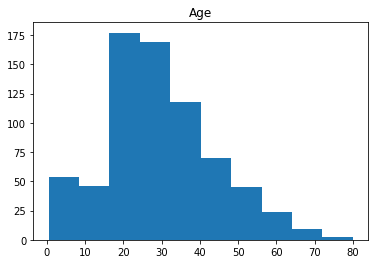

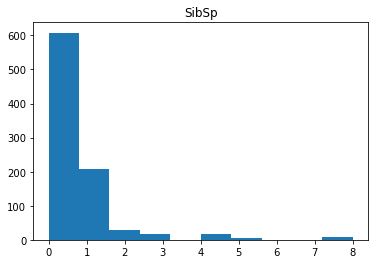

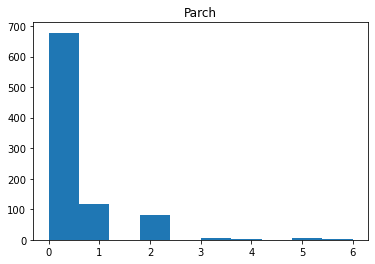

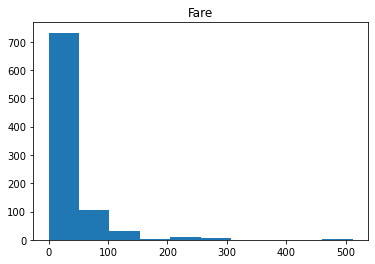

In [14]:
for col in columns:
    plt.hist(x=df[col])
    plt.title(col)
    plt.show()

Given this data, we have a better understanding of the data. And this helps to understand better how how should fill the values for the age. Let's start by filling with the average age


In [15]:
# If we analyse some of the features with the predict label 
X[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can see that people on the best classes had better chances of survival


In [17]:
X[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


People from the female sex, as expected, had better chances of survival

In [18]:
X[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
X[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [20]:
X.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

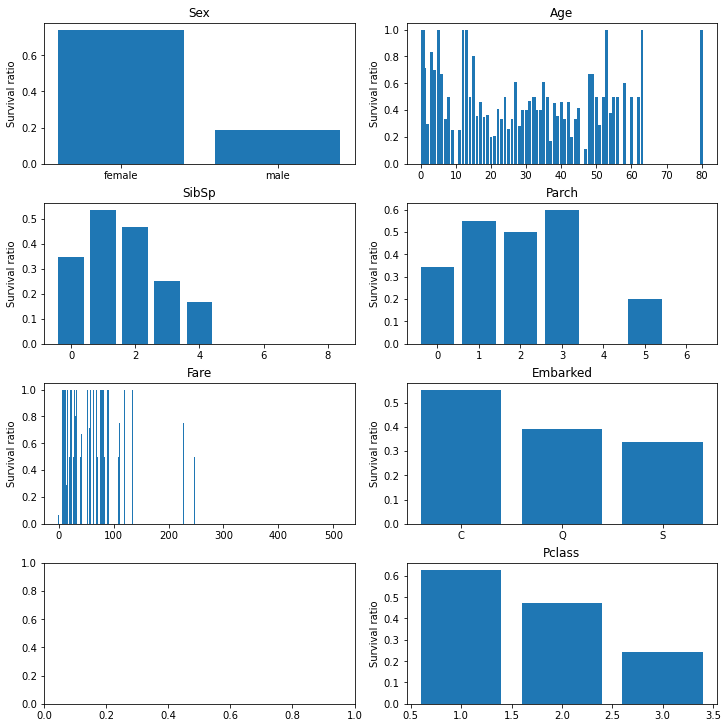

In [21]:
# Lets compare the feature values with predict label
fig, axs = plt.subplots(4, 2, figsize=(10, 10), constrained_layout=True)

for i, col in enumerate(X.columns[1:]):
    sub_cols = [col, "Survived"]

    data = X[sub_cols].groupby([col], as_index=False).mean()

    axs.flat[i-1].bar(data[col], data["Survived"])
    axs.flat[i-1].set_title(col)
    axs.flat[i-1].set_ylabel("Survival ratio")

# 3. Data filling

In [22]:
import numpy as np
age_mean = np.mean(X.Age)

In [23]:
X.loc[:, ["Age"]] = X.Age.fillna(value=age_mean)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Only **Embarked** missing. This, like gender are a very speacial type of variable, that we discussed. So, what we can do is to convert this, into categorical variable first. There are several techniques, that I we are going to test later, but for now we are going to do label encoding by mapping the categorical variable into a integer. We need to be careful with this because this might lead to trouble in linear models. 

In [25]:
# The first thing we do is to identify the unique variables
X.loc[:, "Sex"].unique()

array(['male', 'female'], dtype=object)

# 4. Encode Categorical variables

In [27]:
# as expected so now we need to map it to 0 and 1
sex_map = {"male": 0, "female": 1}
X.loc[:, "Sex"] = X.loc[:, "Sex"].apply(lambda x: sex_map[x] )
# This could also be done using LabelEncoder

In [28]:
# now for embarked 
# convert to categorical 
X['Embarked'] = pd.Categorical(X.Embarked)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


In [30]:
# The first thing we do is to identify the unique variables
X.loc[:, "Embarked"].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

In [31]:
# Let's count the most frequent embark location
X["Embarked"].value_counts() # Let's replace by S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
X["Embarked"] = X["Embarked"].fillna(value="S")

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    int64   
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 49.9 KB


In [34]:
Embarked_map = {"S":0, "C":1, "Q":2}
X.loc[:, "Embarked"] = X.loc[:, "Embarked"].apply(lambda x: Embarked_map[x] )

In [35]:
# conver Embarked to integer
X.Embarked = X.Embarked.astype("int") 

# 5.Split data into train and test

In [ ]:
cd